In [58]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import import_ipynb
from naturalearth_shapes import countries as world;

**Load the Wine Review Dataset**

In [59]:
import kagglehub

path = kagglehub.dataset_download("christopheiv/winemagdata130k")
fname = "winemag-data-130k-v2.csv"
reviews = pd.read_csv(os.path.join(path, fname), index_col=0)
reviews.info()
reviews.head()

<class 'pandas.core.frame.DataFrame'>
Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 13.9+ MB


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


**Determine the number of Winery Locations in the Reviews**

In [60]:
locations = reviews[reviews.country.notna()].groupby(['country', 'winery', 'province']).count()[['title']].reset_index().sort_values('title', ascending=False).copy()
locations

,country,winery,province,title
18307,US,Testarossa,California,218
18852,US,Williams Selyem,California,211
5918,France,Louis Latour,Burgundy,198
14479,US,Chateau Ste. Michelle,Washington,194
5523,France,Georges Duboeuf,Beaujolais,165
...,...,...,...,...
9629,Italy,San Fabiano,Tuscany,1
9623,Italy,Salviano,Central Italy,1
9619,Italy,SalvaTerra,Northeastern Italy,1
9616,Italy,Salicutti,Tuscany,1


In [61]:
wineries_by_countries = locations.groupby(['country', 'winery']).count()[['province']].reset_index().sort_values('province', ascending=False).copy()
wineries_by_countries

,country,winery,province
1577,Chile,Undurraga,18
1387,Chile,Concha y Toro,16
1543,Chile,Santa Carolina,14
1550,Chile,Santa Rita,11
9339,Portugal,Bacalhôa Wines of Portugal,11
...,...,...,...
6036,Italy,Ada Nada,1
6037,Italy,Adalia,1
6038,Italy,Adami,1
6039,Italy,Adanti,1


**Example of Winery with Operations in Multiple Provinces**

For this example, the names appear to be wine regions, not provinces.

In [62]:
reviews[(reviews.country == 'Chile')&(reviews.winery == 'Undurraga')].province.unique()

array(['Maipo Valley', 'Leyda Valley', 'Chile', 'Cauquenes Valley',
       'Curicó Valley', 'Rapel Valley', 'San Antonio', 'Pirque',
       'Leyda Valley-Maipo Valley', 'Curicó and Maipo Valleys',
       'Colchagua Valley', 'Curicó and Leyda Valleys', 'Limarí Valley',
       'Maipo Valley-Colchagua Valley', 'Central Valley', 'Maule Valley',
       'Casablanca Valley', 'Peumo'], dtype=object)

In [63]:
locations = wineries_by_countries.query('province == 1')
locations

,country,winery,province
11170,Spain,Prior Art,1
11566,US,4 Cellars,1
11571,US,6 Under,1
11509,Spain,Zorzal,1
11570,US,6 North,1
...,...,...,...
6036,Italy,Ada Nada,1
6037,Italy,Adalia,1
6038,Italy,Adami,1
6039,Italy,Adanti,1


**Winery by Country**

In [64]:
top_10_countries_with_most_wineries = reviews.groupby(['country', 'winery']).count()[['title']].reset_index().groupby('country').count()[['winery']].sort_values('winery', ascending=False).head(10)
top_10_countries_with_most_wineries

,winery
country,
US,5375
France,3864
Italy,2934
Spain,1435
Argentina,531
Australia,474
Portugal,430
Chile,317
New Zealand,300


In [65]:
print(f'{reviews[reviews.country.isin(top_10_countries_with_most_wineries.index)].shape[0]:,d} reviews in top 10 countries with the most wineries')

121,894 reviews in top 10 countries with the most wineries


**Reviews by Country**

In [66]:
top_10_countries_with_most_reviews = reviews.groupby('country').count()[['title']].sort_values('title', ascending=False).head(10)
top_10_countries_with_most_reviews

,title
country,
US,54504
France,22093
Italy,19540
Spain,6645
Portugal,5691
Chile,4472
Argentina,3800
Austria,3345
Australia,2329


In [67]:
print(f'{reviews[reviews.country.isin(top_10_countries_with_most_reviews.index)].shape[0]:,d} reviews in top 10 countries with the most reviews')

124,584 reviews in top 10 countries with the most reviews


**Combining the sets to hopefully maximize the potential for a match**

In [68]:
countries = set(top_10_countries_with_most_wineries.index)
countries.update(top_10_countries_with_most_reviews.index)
reviews_by_country = reviews[reviews.country.isin(countries)].groupby('country').count()[['title']].sort_values('title', ascending=False)
print(f'{reviews_by_country.title.sum():,d} reviews in {reviews_by_country.shape[0]} countries')
reviews_by_country

127,404 reviews in 12 countries


,title
country,
US,54504
France,22093
Italy,19540
Spain,6645
Portugal,5691
Chile,4472
Argentina,3800
Austria,3345
Australia,2329


## Wineries by Country for top `12` Countries

In [69]:
import quackosm as qosm
import geopandas as gpd

# winery tags filter
tags_filter = {
  'craft': ['distillery', 'winery'], 
  'landuse': 'vineyard',
  # 'shop': 'wine', 
}

In [70]:
to_path = lambda country: f'data/wineries/{country.lower().strip().replace(' ', '_')}_wineries.parquet'

def to_shape(country):
  return world[world.GEOUNIT == country].geometry.values[0]

def fetch(country, tags_filter = tags_filter, shape_filter=None):
  # check whether the country parquet file exists.
  path = to_path(country)
  if os.path.exists(path):
    # if it does, load it
    gdf = gpd.read_parquet(path)
  else:
    # otherwise extract from OSM
    gdf = qosm.convert_geometry_to_geodataframe(
        to_shape(country) if shape_filter is None else shape_filter,
        tags_filter=tags_filter,
        explode_tags=True,
        keep_all_tags=True,
        geometry_coverage_iou_threshold=1e-6,
        allow_uncovered_geometry=True,
    )
    # save wineries to disk
    gdf = gdf[gdf.name.notna()&gdf.geometry.notna()].copy()
    gdf.to_parquet(path)
  return gdf

In [71]:
import contextily as cx
import matplotlib.pyplot as plt

def plot_df(df, column=None, ax=None, alpha=0.5,crs=3857):
    "Plot based on the `geometry` column of a GeoPandas dataframe"
    df = df.copy()
    df = df.to_crs(epsg=crs)  # web mercator

    if ax is None:
        _, ax = plt.subplots(figsize=(8,8))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    df.plot(
        ax=ax,
        alpha=alpha, edgecolor='k',
        column=column, categorical=True,
        legend=True, legend_kwds={'loc': 'upper left'},
    )
    cx.add_basemap(ax, crs=df.crs, source=cx.providers.CartoDB.Positron)


def plot_shape(shape, ax=None, crs=3857):
    df = gpd.GeoDataFrame({'geometry': [shape]}, crs='EPSG:4326')
    plot_df(df, ax=ax, crs=crs)


In [72]:
# collect wineries
wineries = []

**France**

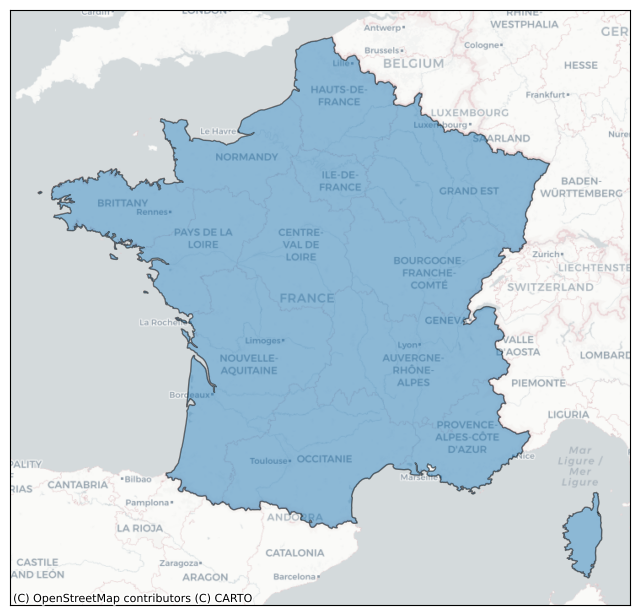

In [73]:
country = 'France'
plot_shape(to_shape(country))

In [74]:
france_wineries = fetch(country)
france_wineries.info()
wineries.append((country, france_wineries))
france_wineries[['name', 'craft', 'landuse', 'geometry']].head()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 5633 entries, node/1239904184 to relation/6490530
Columns: 283 entries, CLC:code to geometry
dtypes: geometry(1), object(282)
memory usage: 12.2+ MB


,name,craft,landuse,geometry
feature_id,,,,
node/1239904184,Château Courtade Dubuc,winery,None,POINT (-0.47656 44.77305)
node/2438040945,Château Coup,winery,None,POINT (2.78396 43.35066)
node/3020555592,Domaine André Regin,winery,None,POINT (7.51057 48.56866)
node/3092954085,Pantzer Camille,winery,None,POINT (7.48962 48.52443)
node/3580211795,Château Franc Pourret,winery,None,POINT (-0.16796 44.90199)


In [75]:
assert os.path.exists(to_path(country))

**Italy**

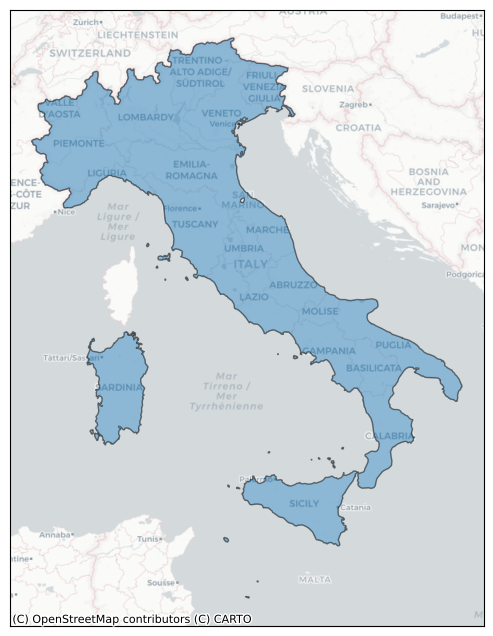

In [76]:
country = 'Italy'
plot_shape(to_shape(country))

In [77]:
italy_wineries = fetch(country)
italy_wineries.info()
wineries.append((country, italy_wineries))
italy_wineries[['name', 'craft', 'landuse', 'geometry']].head()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1586 entries, node/426352030 to relation/2774071
Columns: 234 entries, abandoned to geometry
dtypes: geometry(1), object(233)
memory usage: 2.8+ MB


,name,craft,landuse,geometry
feature_id,,,,
node/426352030,La Viarte,winery,None,POINT (13.45626 46.00963)
node/929003437,Anna Maria Abbona,winery,None,POINT (7.957 44.48731)
node/4408352709,Balestri Valda,winery,None,POINT (11.23877 45.45065)
node/4408372820,Rocca Sveva,winery,None,POINT (11.25116 45.42095)
node/4498442556,Botto Vini,winery,None,POINT (8.46578 44.73359)


In [78]:
assert os.path.exists(to_path(country))

**Spain**

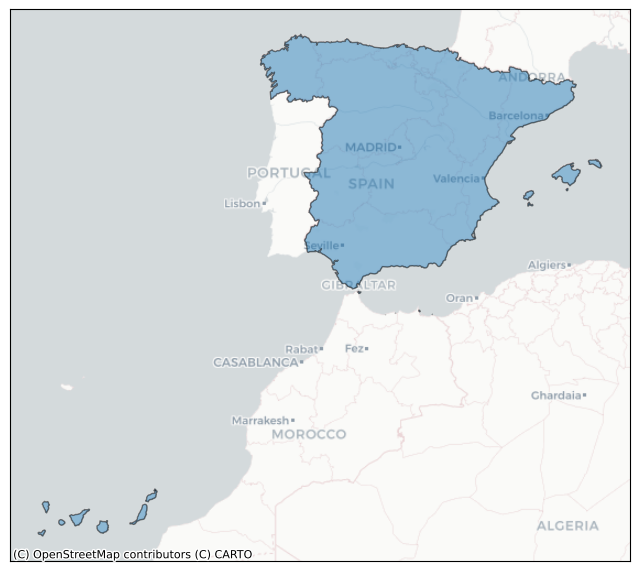

In [79]:
country = 'Spain'
plot_shape(to_shape(country))

In [80]:
spain_wineries = fetch(country)
spain_wineries.info()
wineries.append((country, spain_wineries))
spain_wineries[['name', 'craft', 'landuse', 'geometry']].head()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1170 entries, node/2920727726 to way/1288456185
Columns: 136 entries, CLC:code to geometry
dtypes: geometry(1), object(135)
memory usage: 1.2+ MB


,name,craft,landuse,geometry
feature_id,,,,
node/2920727726,Cooperativa Católico-Agrícola,winery,None,POINT (-6.43631 36.73656)
node/3064960271,Bodega y Viñedos Gosálbez Orti,winery,None,POINT (-3.32121 40.36516)
node/3773193118,De Muller,winery,None,POINT (1.11111 41.12924)
node/4620835691,Bodega Cooperativa San Cristobal,winery,None,POINT (-1.88924 42.67766)
node/4703399104,Can Feixes,winery,None,POINT (1.69092 41.48839)


In [81]:
assert os.path.exists(to_path(country))

**Portugal**

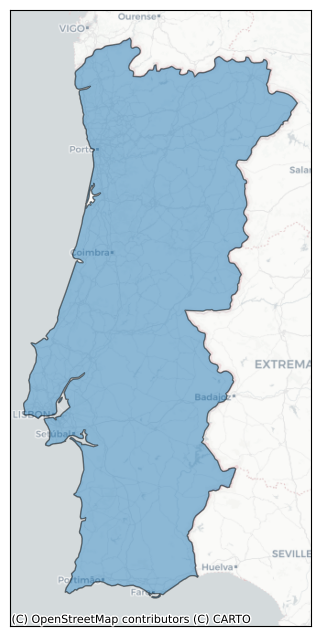

In [82]:
country = 'Portugal'
plot_shape(to_shape(country))

In [83]:
portugal_wineries = fetch(country)
portugal_wineries.info()
wineries.append((country, portugal_wineries))
portugal_wineries[['name', 'craft', 'landuse', 'geometry']].head()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 324 entries, node/2613846270 to way/1343797158
Data columns (total 98 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   access                       1 non-null      object  
 1   addr:city                    33 non-null     object  
 2   addr:country                 3 non-null      object  
 3   addr:housename               3 non-null      object  
 4   addr:housenumber             19 non-null     object  
 5   addr:locality                1 non-null      object  
 6   addr:postcode                30 non-null     object  
 7   addr:street                  38 non-null     object  
 8   addr:unit                    2 non-null      object  
 9   address                      1 non-null      object  
 10  alt_name                     8 non-null      object  
 11  amenity                      2 non-null      object  
 12  barrier                      1 non-n

,name,craft,landuse,geometry
feature_id,,,,
node/2613846270,Quinta da Lixa,winery,None,POINT (-8.15134 41.32741)
node/3441562743,Monte da Casteleja,winery,None,POINT (-8.68475 37.13055)
node/4674547513,Adega do Cantor,winery,None,POINT (-8.28045 37.12325)
node/7598114635,Herdade da Cardeira,winery,None,POINT (-7.46114 38.8481)
node/11406499798,Quinta da Boeira,winery,None,POINT (-8.61144 41.12732)


In [84]:
assert os.path.exists(to_path(country))

**Chile**

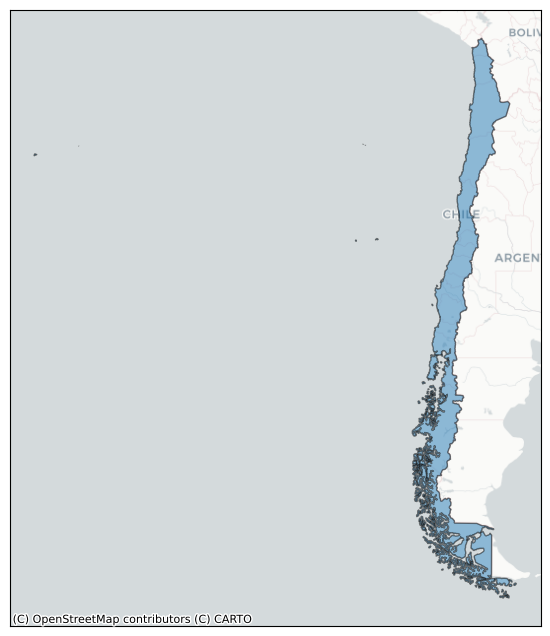

In [85]:
country = 'Chile'
plot_shape(to_shape(country))

In [86]:
chile_wineries = fetch(country)
chile_wineries.info()
wineries.append((country, chile_wineries))
chile_wineries[['name', 'craft', 'landuse', 'geometry']].head()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 121 entries, node/10271466044 to way/932220051
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   access            0 non-null      object  
 1   addr:city         10 non-null     object  
 2   addr:housenumber  4 non-null      object  
 3   addr:postcode     1 non-null      object  
 4   addr:street       10 non-null     object  
 5   agricultural      0 non-null      object  
 6   amenity           1 non-null      object  
 7   building          22 non-null     object  
 8   contact:email     1 non-null      object  
 9   contact:phone     1 non-null      object  
 10  craft             55 non-null     object  
 11  crop              50 non-null     object  
 12  cuisine           1 non-null      object  
 13  description       3 non-null      object  
 14  designation       3 non-null      object  
 15  email             6 non-null      object  
 16

,name,craft,landuse,geometry
feature_id,,,,
node/10271466044,Viña Los Boldos,winery,None,POINT (-70.81858 -34.30031)
relation/8462840,Concha y Toro,None,vineyard,"POLYGON ((-70.57713 -33.63461, -70.57748 -33.6..."
way/1203840139,Viña Requingua,winery,None,"POLYGON ((-71.34478 -35.02656, -71.34569 -35.0..."
way/236882380,Viña La Posada,None,vineyard,"POLYGON ((-71.37773 -34.64317, -71.37884 -34.6..."
way/37268094,Viña Aquitania,None,vineyard,"POLYGON ((-70.55012 -33.49113, -70.54265 -33.4..."


In [87]:
assert os.path.exists(to_path(country))

**Argentina**

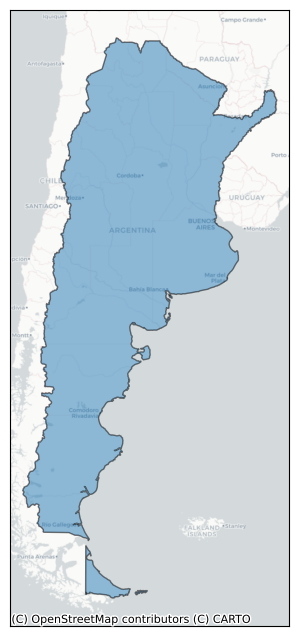

In [88]:
country = 'Argentina'
plot_shape(to_shape(country))

In [89]:
argentina_wineries = fetch(country)
argentina_wineries.info()
wineries.append((country, argentina_wineries))
argentina_wineries[['name', 'craft', 'landuse', 'geometry']].head()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 312 entries, node/12138936469 to way/977102918
Data columns (total 65 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   addr:city                69 non-null     object  
 1   addr:country             4 non-null      object  
 2   addr:full                6 non-null      object  
 3   addr:housename           1 non-null      object  
 4   addr:housenumber         34 non-null     object  
 5   addr:milestone           1 non-null      object  
 6   addr:postcode            35 non-null     object  
 7   addr:street              73 non-null     object  
 8   addr:street_1            2 non-null      object  
 9   addr:suburb              1 non-null      object  
 10  air_conditioning         1 non-null      object  
 11  alt_name                 1 non-null      object  
 12  barrier                  2 non-null      object  
 13  building                 68 non-null 

,name,craft,landuse,geometry
feature_id,,,,
node/12138936469,Aguma Casa Vinícola,winery,None,POINT (-68.62565 -31.52466)
node/12459924702,Casa Corbel,winery,None,POINT (-68.77426 -33.02842)
node/2644076159,Tirarelli,winery,None,POINT (-68.41108 -33.27515)
node/2963350189,Bodega Terra Camiare,winery,None,POINT (-64.06454 -31.01196)
node/4699496091,Winery,winery,None,POINT (-58.37125 -34.60324)


In [90]:
assert os.path.exists(to_path(country))

**Austria**

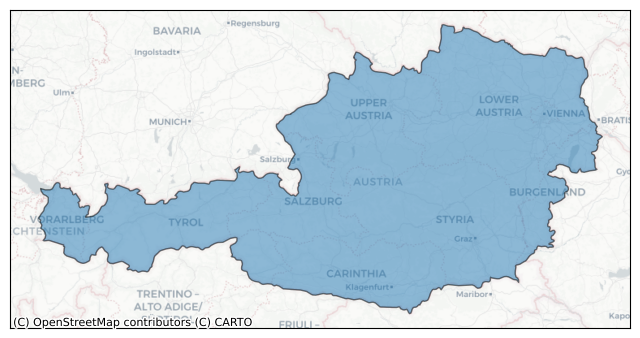

In [91]:
country = 'Austria'
plot_shape(to_shape(country))

In [92]:
austria_wineries = fetch(country)
austria_wineries.info()
wineries.append((country, austria_wineries))
austria_wineries[['name', 'craft', 'landuse', 'geometry']].head()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 926 entries, node/11201715030 to way/855156283
Columns: 135 entries, access to geometry
dtypes: geometry(1), object(134)
memory usage: 983.9+ KB


,name,craft,landuse,geometry
feature_id,,,,
node/11201715030,Weingut Johannes Holzer,winery,None,POINT (15.75847 48.44951)
node/12407495165,Winzerhof Allacher,winery,None,POINT (16.81507 47.77876)
node/1375042428,Scharinger,winery,None,POINT (15.94215 48.51009)
node/1375042434,Obenaus,winery,None,POINT (15.94191 48.51)
node/3695009480,Weingut Göschl Reinhard u Edith,winery,None,POINT (16.91951 47.88937)


In [93]:
assert os.path.exists(to_path(country))

**Australia**

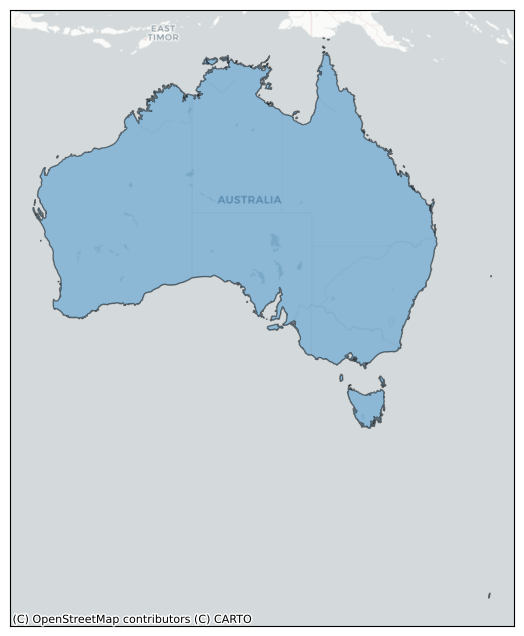

In [94]:
country = 'Australia'
plot_shape(to_shape(country))

In [95]:
australia_wineries = fetch(country)
australia_wineries.info()
wineries.append((country, australia_wineries))
australia_wineries[['name', 'craft', 'landuse', 'geometry']].head()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 681 entries, node/1227333254 to way/1171896328
Columns: 109 entries, addr:city to geometry
dtypes: geometry(1), object(108)
memory usage: 585.2+ KB


,name,craft,landuse,geometry
feature_id,,,,
node/1227333254,Edgecombe Brothers,winery,None,POINT (115.99857 -31.79519)
node/3902990268,Black George Winery,winery,None,POINT (116.17336 -34.31832)
node/4568346769,Killerby,winery,None,POINT (115.03766 -33.81412)
node/4568353963,Vasse,winery,None,POINT (115.04266 -33.82263)
node/4568354322,Driftwood Estate,winery,None,POINT (115.03567 -33.73273)


In [96]:
assert os.path.exists(to_path(country))

**Germany**

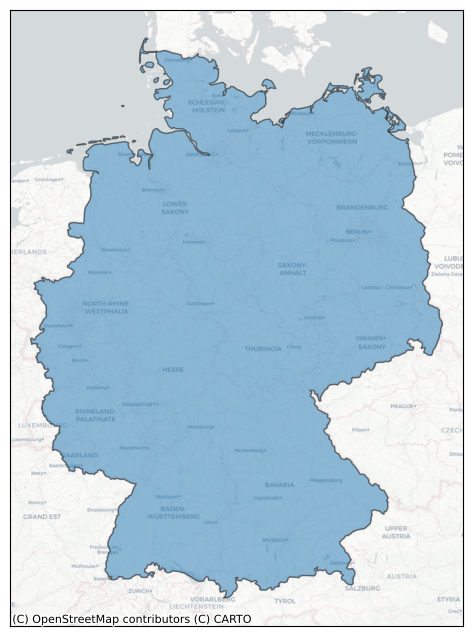

In [97]:
country = 'Germany'
plot_shape(to_shape(country))

In [98]:
germany_wineries = fetch(country)
germany_wineries.info()
wineries.append((country, germany_wineries))
germany_wineries[['name', 'craft', 'landuse', 'geometry']].head()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 3918 entries, node/10095342976 to way/99062805
Columns: 275 entries, CLC:code to geometry
dtypes: geometry(1), object(274)
memory usage: 8.3+ MB


,name,craft,landuse,geometry
feature_id,,,,
node/10095342976,Weingut Kohl -Spieß,winery,None,POINT (8.17651 49.53799)
node/10239838713,Weingut Thomas Steigelmann,winery,None,POINT (8.15435 49.37524)
node/1028246545,Weingut Ems-Post,winery,None,POINT (8.11534 50.02708)
node/10566079407,Weingut Schackert,winery,None,POINT (8.13573 49.32075)
node/10739804643,Weingut Bernhart,winery,None,POINT (7.9545 49.05102)


In [99]:
assert os.path.exists(to_path(country))

**New Zealand**

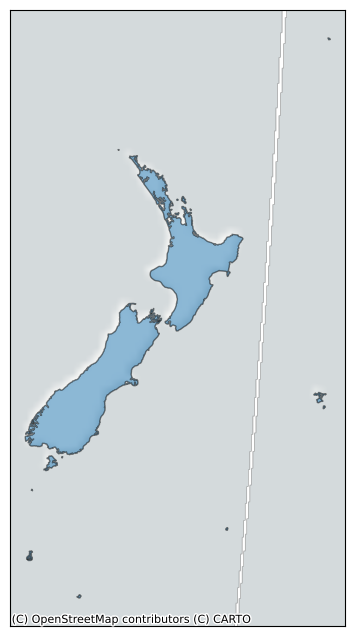

In [100]:
country = 'New Zealand'
plot_shape(to_shape(country), crs=2193)

In [101]:
new_zealand_wineries = fetch(country)
new_zealand_wineries.info()
wineries.append((country, new_zealand_wineries))
new_zealand_wineries[['name', 'craft', 'landuse', 'geometry']].head()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 165 entries, node/2615977455 to relation/15440212
Data columns (total 53 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   LINZ:dataset          6 non-null      object  
 1   LINZ:layer            6 non-null      object  
 2   LINZ:source_version   7 non-null      object  
 3   addr:city             13 non-null     object  
 4   addr:hamlet           4 non-null      object  
 5   addr:housename        2 non-null      object  
 6   addr:housenumber      26 non-null     object  
 7   addr:place            1 non-null      object  
 8   addr:postcode         13 non-null     object  
 9   addr:street           28 non-null     object  
 10  addr:suburb           13 non-null     object  
 11  alt_name              2 non-null      object  
 12  amenity               13 non-null     object  
 13  attribution           7 non-null      object  
 14  building              44 no

,name,craft,landuse,geometry
feature_id,,,,
node/2615977455,Red Barrel,winery,None,POINT (176.90588 -39.66994)
node/2615997350,Craggy Range,winery,None,POINT (176.9227 -39.69253)
node/2615997353,Te Mata Estate,winery,None,POINT (176.91592 -39.67058)
node/10177356205,Hans Herzog,winery,None,POINT (173.84194 -41.47553)
node/4739175014,Nautilus Estate,winery,None,POINT (173.81851 -41.48664)


In [102]:
assert os.path.exists(to_path(country))

**South Africa**

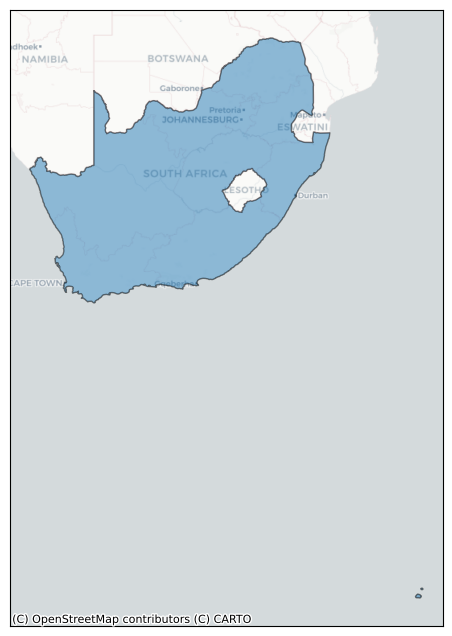

In [103]:
country = 'South Africa'
plot_shape(to_shape(country))

In [104]:
south_africa_wineries = fetch(country)
south_africa_wineries.info()
wineries.append((country, south_africa_wineries))
south_africa_wineries[['name', 'craft', 'landuse', 'geometry']].head()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 155 entries, node/1027802215 to way/1303739614
Data columns (total 54 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   addr:city          23 non-null     object  
 1   addr:housenumber   3 non-null      object  
 2   addr:postcode      21 non-null     object  
 3   addr:street        18 non-null     object  
 4   addr:unit          1 non-null      object  
 5   amenity            6 non-null      object  
 6   attraction         1 non-null      object  
 7   brand              1 non-null      object  
 8   building           36 non-null     object  
 9   building:levels    1 non-null      object  
 10  cellar:use         1 non-null      object  
 11  check_date         4 non-null      object  
 12  contact:email      3 non-null      object  
 13  contact:facebook   2 non-null      object  
 14  contact:instagram  2 non-null      object  
 15  contact:phone      2 non-null

,name,craft,landuse,geometry
feature_id,,,,
node/1027802215,Delaire Graff Estate,winery,None,POINT (18.92271 -33.9218)
node/9074159477,Bartho Eksteen Wines & MANÁ Eatery,winery,None,POINT (19.21737 -34.39925)
node/5091655455,Kaapse Familie Winery,winery,None,POINT (18.97877 -33.7575)
node/5585143038,Eikendal Winery,winery,None,POINT (18.82347 -34.01283)
node/4492238121,Vredendal Keldery,winery,None,POINT (18.51677 -31.65266)


In [105]:
assert os.path.exists(to_path(country))

#### United States

In [106]:
# TODO determine what states are represented in the reviews
# TODO download ne data if does not exist
reviews[(reviews.country == 'US')].info()
reviews[(reviews.country == 'US')][['winery', 'province', 'title']].head()

<class 'pandas.core.frame.DataFrame'>
Index: 54504 entries, 2 to 129967
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                54504 non-null  object 
 1   description            54504 non-null  object 
 2   designation            36908 non-null  object 
 3   points                 54504 non-null  int64  
 4   price                  54265 non-null  float64
 5   province               54504 non-null  object 
 6   region_1               54226 non-null  object 
 7   region_2               50511 non-null  object 
 8   taster_name            37730 non-null  object 
 9   taster_twitter_handle  34741 non-null  object 
 10  title                  54504 non-null  object 
 11  variety                54504 non-null  object 
 12  winery                 54504 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 5.8+ MB


,winery,province,title
2,Rainstorm,Oregon,Rainstorm 2013 Pinot Gris (Willamette Valley)
3,St. Julian,Michigan,St. Julian 2013 Reserve Late Harvest Riesling ...
4,Sweet Cheeks,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...
10,Kirkland Signature,California,Kirkland Signature 2011 Mountain Cuvée Caberne...
12,Louis M. Martini,California,Louis M. Martini 2012 Cabernet Sauvignon (Alex...


In [107]:
reviews[(reviews.country == 'US')].groupby('province').count()[['title']].sort_values('title', ascending=False)

,title
province,
California,36247
Washington,8639
Oregon,5373
New York,2688
Virginia,777
Idaho,192
Michigan,114
America,95
Texas,94


In [108]:
reviews[((reviews.country == 'US'))&(reviews.province == 'America')][['winery', 'region_1', 'region_2']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 95 entries, 1627 to 129456
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   winery    95 non-null     object
 1   region_1  0 non-null      object
 2   region_2  0 non-null      object
dtypes: object(3)
memory usage: 3.0+ KB


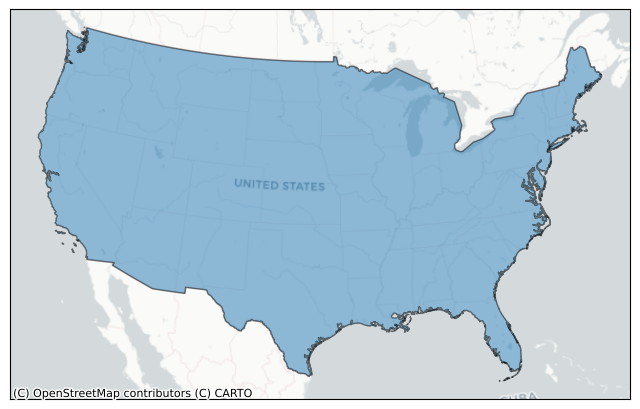

In [109]:
# TODO download file if not present
world_sub_units = gpd.read_file('data/ne_10m_admin_0_map_subunits/')
country = 'United States'
us = world_sub_units[world_sub_units.SUBUNIT==country].geometry.values[0]
plot_shape(us, crs=6350)

In [110]:
us_wineries = fetch(country, shape_filter=us)
us_wineries.info()
wineries.append((country, us_wineries))
us_wineries[['name', 'craft', 'landuse', 'geometry']].head()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 2913 entries, node/1102646761 to way/99646474
Columns: 277 entries, Attribution to geometry
dtypes: geometry(1), object(276)
memory usage: 6.2+ MB


,name,craft,landuse,geometry
feature_id,,,,
node/1102646761,River Run Vintners,winery,None,POINT (-121.64129 36.899)
node/11103502435,Quattro Goombas Winery,winery,None,POINT (-77.61743 38.986)
node/11342024776,Koval Distillery,distillery,None,POINT (-87.67369 41.95912)
node/11480616547,Honnibrook,winery,None,POINT (-104.86838 39.35076)
node/11498945648,Gallucci Vineyards,winery,None,POINT (-121.68131 37.10386)


In [111]:
assert os.path.exists(to_path(country))

In [112]:
wineries

[('France',
                   CLC:code CLC:id CLC:year abandoned access access:covid19  \
  feature_id                                                                  
  node/1239904184      None   None     None      None   None           None   
  node/2438040945      None   None     None      None   None           None   
  node/3020555592      None   None     None      None   None           None   
  node/3092954085      None   None     None      None   None           None   
  node/3580211795      None   None     None      None   None           None   
  ...                   ...    ...      ...       ...    ...            ...   
  relation/4835310     None   None     None      None   None           None   
  relation/4835311     None   None     None      None   None           None   
  relation/6303535     None   None     None      None   None           None   
  relation/6303596     None   None     None      None   None           None   
  relation/6490530     None   None     N

In [113]:
france_wineries[['name', 'name:en', 'geometry']]

,name,name:en,geometry
feature_id,,,
node/1239904184,Château Courtade Dubuc,None,POINT (-0.47656 44.77305)
node/2438040945,Château Coup,None,POINT (2.78396 43.35066)
node/3020555592,Domaine André Regin,None,POINT (7.51057 48.56866)
node/3092954085,Pantzer Camille,None,POINT (7.48962 48.52443)
node/3580211795,Château Franc Pourret,None,POINT (-0.16796 44.90199)
...,...,...,...
relation/4835310,Climat Champ Gain (1er Cru),None,"MULTIPOLYGON (((4.73783 46.95401, 4.73748 46.9..."
relation/4835311,Climat La Truffière (1er Cru),None,"MULTIPOLYGON (((4.74273 46.95646, 4.74292 46.9..."
relation/6303535,Vignoble de Marignan,None,"MULTIPOLYGON (((6.37027 46.32043, 6.37025 46.3..."
